In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold 
from collections import Counter

from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

In [2]:
#dataset loading
dataset = pd.read_csv('C:/Users/Anirudh MV/Downloads/Insurance Dataset.csv')
dataset.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [3]:
#display coloumns
dataset.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [4]:
# removing spaces in dataset column names..

dataset.columns = dataset.columns.to_series().apply(lambda x: x.replace(' ', '_')).to_list()
dataset.columns = dataset.columns.to_series().apply(lambda x: x.replace('/', '_')).to_list()
dataset.columns.values

array(['Area_Service', 'Hospital_County', 'Hospital_Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl',
       'Admission_type', 'Home_or_self_care,', 'ccs_diagnosis_code',
       'ccs_procedure_code', 'apr_drg_description', 'Code_illness',
       'Mortality_risk', 'Surg_Description', 'Weight_baby', 'Abortion',
       'Emergency_dept_yes_No', 'Tot_charg', 'Tot_cost',
       'ratio_of_total_costs_to_total_charges', 'Result',
       'Payment_Typology'], dtype=object)

In [5]:
#rename
dataset.rename(columns={'Home_or_self_care,': 'Home_or_self_care'}, inplace=True)

In [6]:
data= pd.read_csv('C:/Users/Anirudh MV/Downloads/Insurance Dataset.csv')
data_sample_view = data.head(2)

In [7]:
# for deployment part...sample dataframe view..
dump(data_sample_view, 'data_sample_view.joblib')

['data_sample_view.joblib']

In [8]:
dataset.shape

(1048575, 24)

In [9]:
#drop duplicates
dataset.drop_duplicates(inplace=True)

In [10]:
#drop null values
dataset.dropna(inplace=True)

In [11]:
dataset.shape

(1041265, 24)

In [12]:
dataset.isnull().sum()

Area_Service                             0
Hospital_County                          0
Hospital_Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home_or_self_care                        0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality_risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency_dept_yes_No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [13]:
#describe the dataset
dataset.describe()

,Hospital_Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06,1.041265e+06
mean,6.525299e+02,1.986232e+02,9.708783e+01,2.057127e+00,1.753033e+00,2.822095e+02,2.721891e+04,1.050903e+04,4.560897e-01,7.494355e-01,1.938392e+00
std,6.696444e+02,1.655839e+02,8.729973e+01,9.141524e-01,9.875512e-01,9.324650e+02,5.502059e+04,2.234352e+04,8.026395e-01,4.333383e-01,7.717183e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.480430e+03,3.264680e+03,3.133504e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,8.800000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.468769e+04,5.962550e+03,4.089940e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.730000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.928040e+04,1.138990e+04,5.186988e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041265 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041265 non-null  object 
 1   Hospital_County                        1041265 non-null  object 
 2   Hospital_Id                            1041265 non-null  float64
 3   Age                                    1041265 non-null  object 
 4   Gender                                 1041265 non-null  object 
 5   Cultural_group                         1041265 non-null  object 
 6   ethnicity                              1041265 non-null  object 
 7   Days_spend_hsptl                       1041265 non-null  object 
 8   Admission_type                         1041265 non-null  object 
 9   Home_or_self_care                      1041265 non-null  object 
 10  ccs_diagnosis_code                     104

In [15]:
dataset.select_dtypes(include=['object']).head(2)

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,apr_drg_description,Surg_Description,Abortion,Emergency_dept_yes_No
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,Other pneumonia,Medical,N,Y
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,Cellulitis & other skin infections,Medical,N,Y


### EDA

<AxesSubplot:xlabel='Area_Service', ylabel='count'>

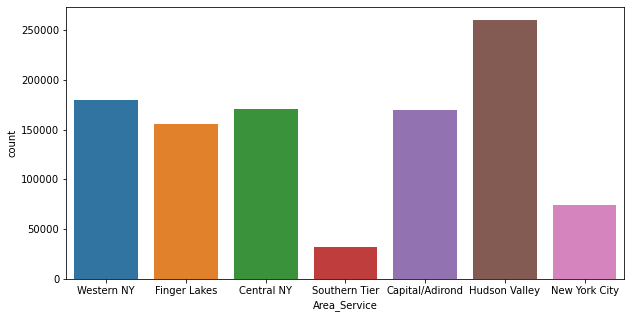

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Area_Service'])

In [17]:
len(dataset['Hospital_County'].unique())

51

<AxesSubplot:xlabel='Age', ylabel='count'>

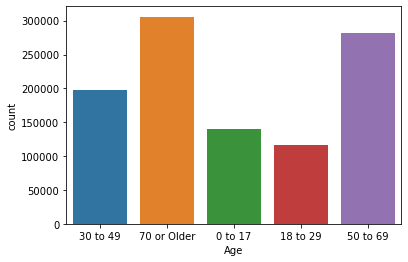

In [18]:
len(dataset['Age'].unique())
dataset['Age'].value_counts()
sns.countplot(dataset['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

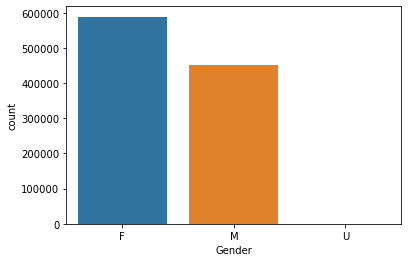

In [19]:
len(dataset['Gender'].unique())
dataset['Gender'].value_counts()
sns.countplot(dataset['Gender'])

<AxesSubplot:xlabel='Cultural_group', ylabel='count'>

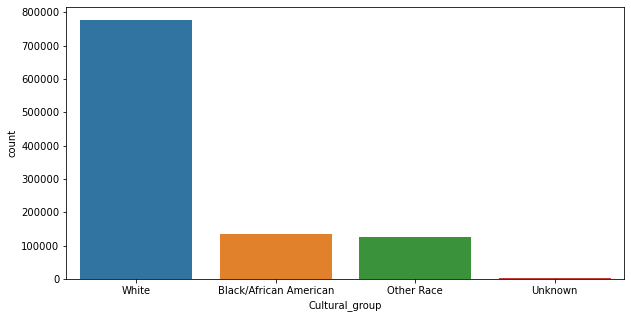

In [20]:
plt.figure(figsize=(10,5))
len(dataset['Cultural_group'].unique())
dataset['Cultural_group'].value_counts()
sns.countplot(dataset['Cultural_group'])

<AxesSubplot:xlabel='ethnicity', ylabel='count'>

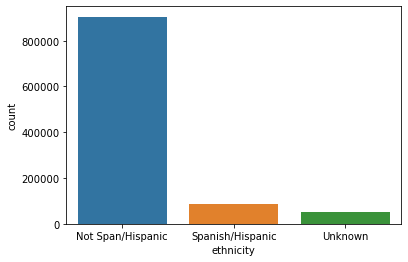

In [21]:
len(dataset['ethnicity'].unique())
dataset['ethnicity'].value_counts()
sns.countplot(dataset['ethnicity'])

<AxesSubplot:xlabel='Admission_type', ylabel='count'>

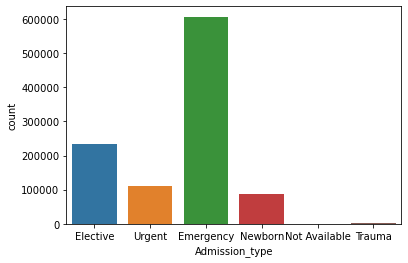

In [22]:
len(dataset['Admission_type'].unique())
dataset['Admission_type'].value_counts()
sns.countplot(dataset['Admission_type'])

In [23]:
len(dataset['Home_or_self_care'].unique())

19

In [24]:
len(dataset['ccs_procedure_code'].unique())

228

<AxesSubplot:xlabel='Code_illness', ylabel='count'>

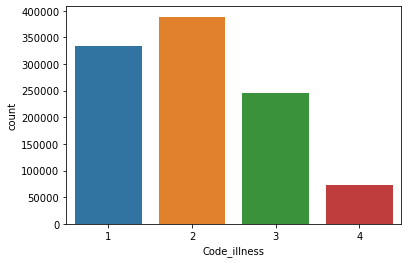

In [25]:
len(dataset['Code_illness'].unique())
dataset['Code_illness'].value_counts()
sns.countplot(dataset['Code_illness'])

<AxesSubplot:xlabel='Mortality_risk', ylabel='count'>

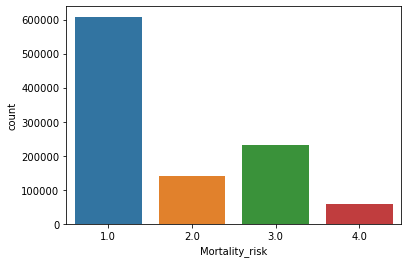

In [26]:
len(dataset['Mortality_risk'].unique())
dataset['Mortality_risk'].value_counts()
sns.countplot(dataset['Mortality_risk'])

<AxesSubplot:xlabel='Surg_Description', ylabel='count'>

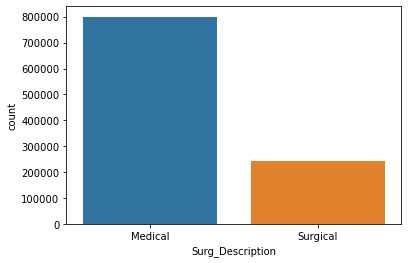

In [27]:
len(dataset['Surg_Description'].unique())
dataset['Surg_Description'].value_counts()
sns.countplot(dataset['Surg_Description'])

In [28]:
len(dataset['ccs_diagnosis_code'].unique())

258

<AxesSubplot:xlabel='Result', ylabel='count'>

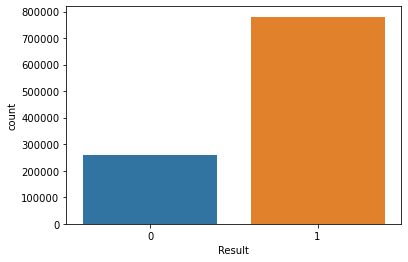

In [29]:
len(dataset['Result'].unique())
dataset['Result'].value_counts()
sns.countplot(dataset['Result'])

<AxesSubplot:xlabel='Payment_Typology', ylabel='count'>

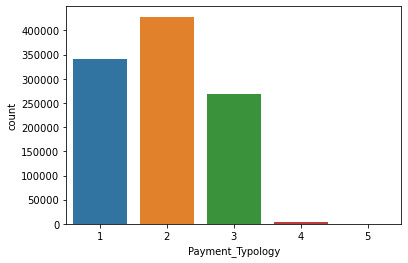

In [30]:
len(dataset['Payment_Typology'].unique())
dataset['Payment_Typology'].value_counts()
sns.countplot(dataset['Payment_Typology'])

### Let us check for outliers

<AxesSubplot:>

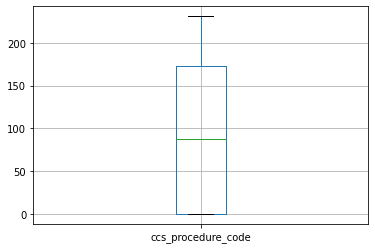

In [31]:
dataset.boxplot(column='ccs_procedure_code')

<AxesSubplot:xlabel='ccs_procedure_code', ylabel='Density'>

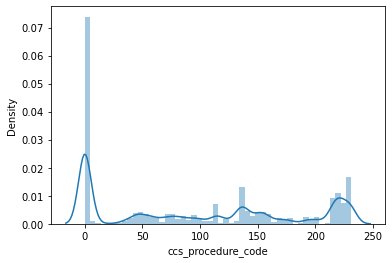

In [32]:
sns.distplot(dataset.ccs_procedure_code)

<AxesSubplot:xlabel='ccs_diagnosis_code', ylabel='Density'>

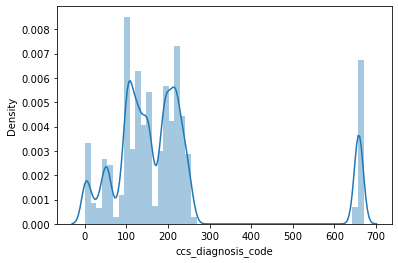

In [33]:
sns.distplot(dataset.ccs_diagnosis_code)

<AxesSubplot:>

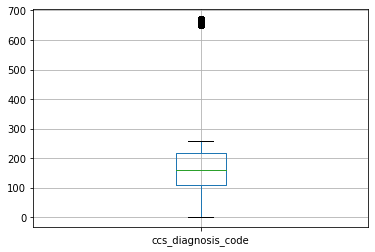

In [34]:
dataset.boxplot(column='ccs_diagnosis_code')

<AxesSubplot:>

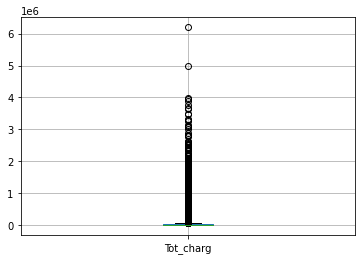

In [35]:
dataset.boxplot(column='Tot_charg')

<AxesSubplot:xlabel='Tot_charg', ylabel='Density'>

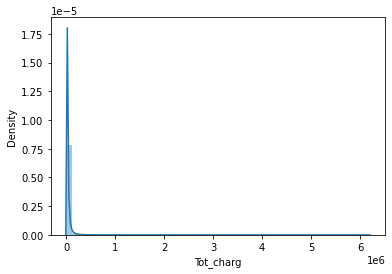

In [36]:
sns.distplot(dataset.Tot_charg)

<AxesSubplot:>

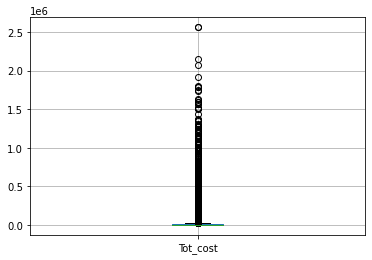

In [37]:
dataset.boxplot(column='Tot_cost')

<AxesSubplot:xlabel='Tot_cost', ylabel='Density'>

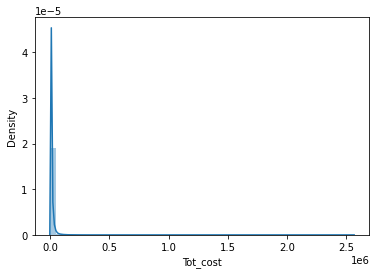

In [38]:
sns.distplot(dataset.Tot_cost)

<AxesSubplot:>

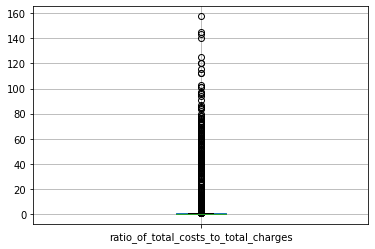

In [39]:
dataset.boxplot(column='ratio_of_total_costs_to_total_charges')

<AxesSubplot:xlabel='ratio_of_total_costs_to_total_charges', ylabel='Density'>

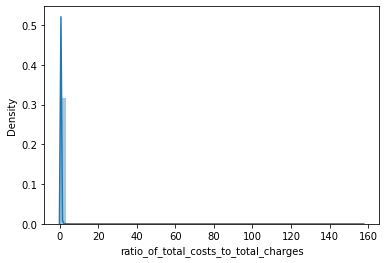

In [40]:
sns.distplot(dataset.ratio_of_total_costs_to_total_charges)

In [41]:
dataset.skew()

Hospital_Id                               6.549897
ccs_diagnosis_code                        1.945264
ccs_procedure_code                        0.221920
Code_illness                              0.442781
Mortality_risk                            0.866295
Weight_baby                               3.108478
Tot_charg                                18.068372
Tot_cost                                 27.587478
ratio_of_total_costs_to_total_charges    96.372422
Result                                   -1.151230
Payment_Typology                          0.153149
dtype: float64

### Check for Correlation between Features

In [42]:
dataset.head()

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [43]:
dataset.corr()

,Hospital_Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
Hospital_Id,1.000000,0.052711,0.019366,-0.047558,-0.041745,0.039582,0.021072,0.003542,0.004918,-0.001362,0.149703
ccs_diagnosis_code,0.052711,1.000000,0.051307,-0.181906,-0.269338,0.034817,-0.076322,-0.041976,0.030690,0.000317,-0.075115
ccs_procedure_code,0.019366,0.051307,1.000000,0.013522,-0.035020,0.117272,0.025710,0.034001,0.017527,-0.000441,-0.050949
Code_illness,-0.047558,-0.181906,0.013522,1.000000,0.635410,-0.262322,0.290234,0.246470,-0.033883,0.002065,0.155879
Mortality_risk,-0.041745,-0.269338,-0.035020,0.635410,1.000000,-0.217464,0.221497,0.181717,-0.036955,0.002483,0.182199
Weight_baby,0.039582,0.034817,0.117272,-0.262322,-0.217464,1.000000,-0.099443,-0.097408,0.018374,-0.003758,-0.120175
Tot_charg,0.021072,-0.076322,0.025710,0.290234,0.221497,-0.099443,1.000000,0.723527,-0.043142,-0.001055,0.080635
Tot_cost,0.003542,-0.041976,0.034001,0.246470,0.181717,-0.097408,0.723527,1.000000,0.421115,-0.001400,0.056357
ratio_of_total_costs_to_total_charges,0.004918,0.030690,0.017527,-0.033883,-0.036955,0.018374,-0.043142,0.421115,1.000000,0.000465,-0.034675
Result,-0.001362,0.000317,-0.000441,0.002065,0.002483,-0.003758,-0.001055,-0.001400,0.000465,1.000000,0.001351


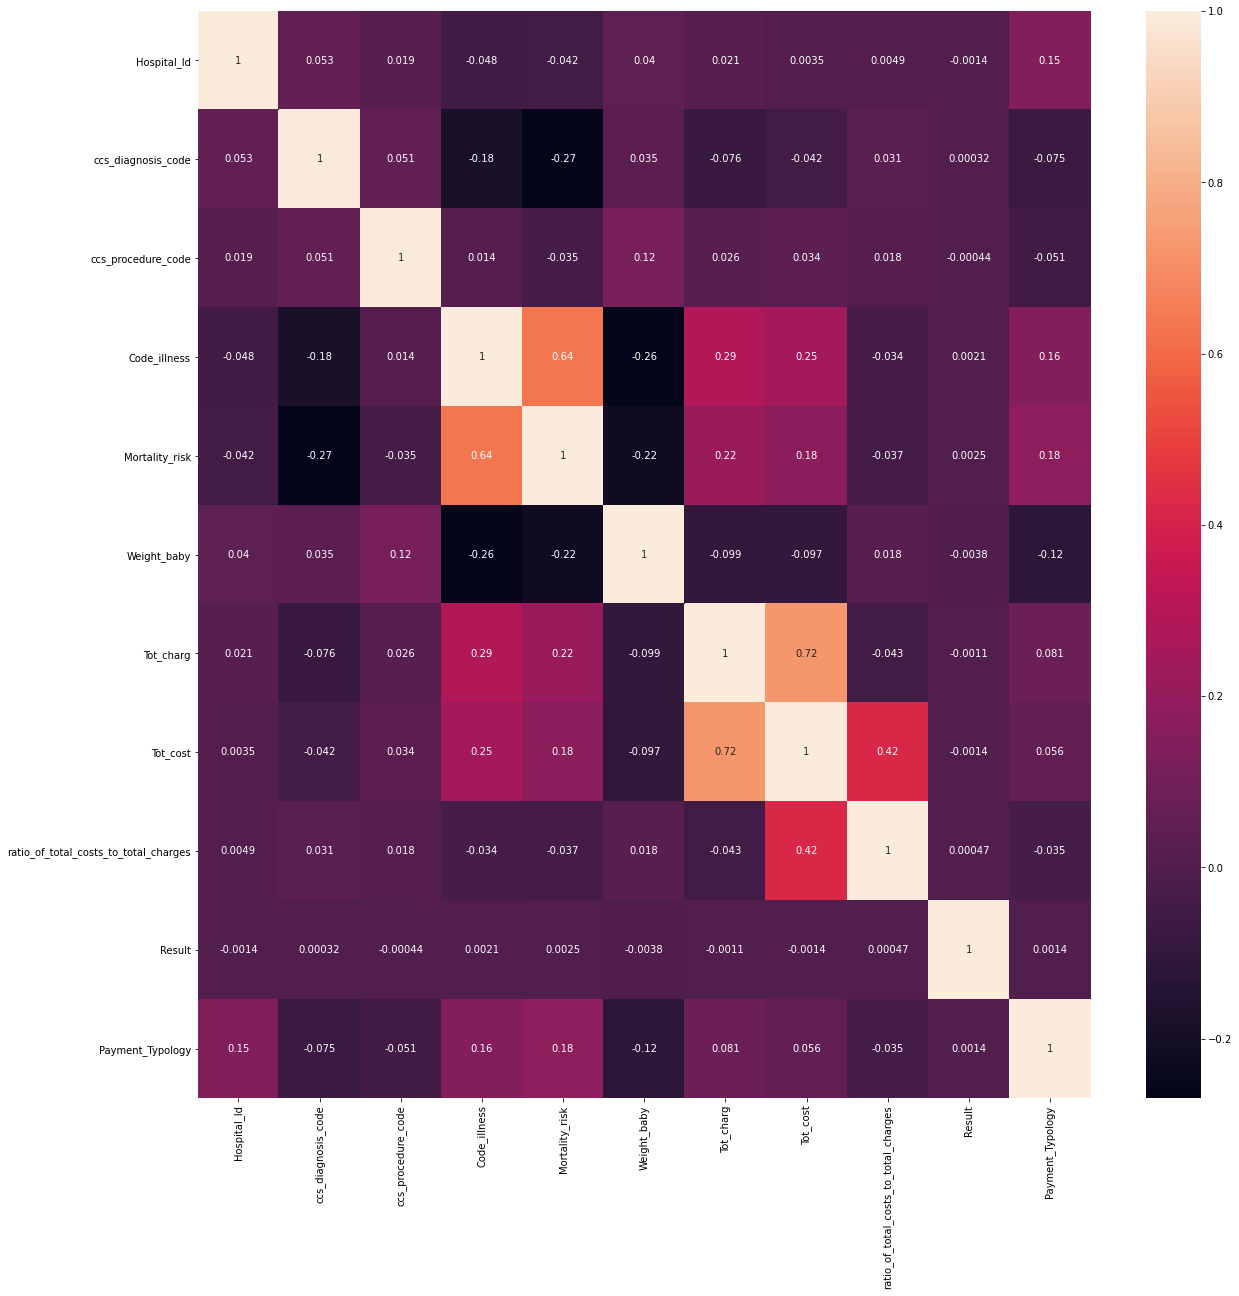

In [44]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True)

In [45]:
#### trying to convert string formatted data to integer / find out which value is not getting converted to integer datatype

for i in dataset.Days_spend_hsptl.unique():
    try:
        int(i)
    except ValueError:
        print(i)

120 +


#### So we have '120 +' entry in Days_spend_hsptl column. that is days spend hospital is more than 120..So we can replace it by integer 120 & Convert this column to integer dataype

### Dividing data in to Predictors and Target

In [46]:
X=dataset.drop(columns=['Result'])
X.columns
X.head()

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1


In [47]:
Y=dataset.Result
Y

0          1
1          1
2          1
3          0
4          1
          ..
1048570    1
1048571    1
1048572    0
1048573    1
1048574    1
Name: Result, Length: 1041265, dtype: int64

In [48]:
X.shape

(1041265, 23)

In [49]:
# replacing value

dataset.replace({'Days_spend_hsptl': '120 +'}, 120, inplace=True)

In [50]:
# converting to intger datatype column..

dataset.Days_spend_hsptl = dataset.Days_spend_hsptl.astype('int')

In [51]:
dataset.select_dtypes(exclude='object').head(2)

,Hospital_Id,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,37.0,4,122,0,1,1.0,0,5511.95,5582.49,1.012798,1,1
1,37.0,4,197,0,3,2.0,0,4783.20,5162.82,1.079365,1,1


In [52]:
dataset.Hospital_Id = dataset.Hospital_Id.astype('int')
dataset.Mortality_risk = dataset.Mortality_risk.astype('int')

#### Dropping non-importanat columns

In [53]:
dataset.drop(['Hospital_Id', 'apr_drg_description', 'Abortion', 'Weight_baby'], axis=1, inplace=True)

In [54]:
dataset.head(2)

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,1,1,Medical,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,3,2,Medical,Y,4783.20,5162.82,1.079365,1,1


In [55]:
#encoding.
dataset.select_dtypes(include=['object']).head(2)

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Admission_type,Home_or_self_care,Surg_Description,Emergency_dept_yes_No
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic,Elective,Home or Self Care,Medical,Y
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic,Urgent,Short-term Hospital,Medical,Y


In [56]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
label = LabelEncoder()
label_binizer =LabelBinarizer()

In [57]:
label_area = label.fit(dataset.Area_Service)
label_Hospital_County = label.fit(dataset.Hospital_County)
label_Age = label.fit(dataset.Age)
label_Cultural_group = label.fit(dataset.Cultural_group)
label_ethnicity= label.fit(dataset.ethnicity)
label_Admission_type = label.fit(dataset.Admission_type)
label_Home_or_self_care = label.fit(dataset.Home_or_self_care)

In [58]:
one_hot_Gender = label_binizer.fit(dataset.Gender)
one_hot_Surg_Description = label_binizer.fit(dataset.Surg_Description)
one_hot_Emergency_dept_yes_No = label_binizer.fit(dataset.Emergency_dept_yes_No)

In [59]:
label_encoder_list = [label_area, label_Hospital_County,
                label_Age, label_Cultural_group,
                label_ethnicity, label_Admission_type,
                label_Home_or_self_care]

one_hot_coder_list = [one_hot_Gender, one_hot_Surg_Description, one_hot_Emergency_dept_yes_No]

#### pickling encoding object & columns for deployment point of view...

In [60]:
from joblib import dump, load

In [61]:
dump(label_encoder_list, 'label_encoder_list.joblib')

['label_encoder_list.joblib']

In [62]:
dump(one_hot_coder_list, 'one_hot_coder_list.joblib')

['one_hot_coder_list.joblib']

In [63]:
label_to_column = ['Area_Service', 'Hospital_County',
                  'Age', 'Cultural_group', 'ethnicity',
                  'Admission_type', 'Home_or_self_care']

one_hot_column = ['Gender', 'Surg_Description', 'Emergency_dept_yes_No']

In [64]:
dump(label_to_column, 'label_to_column.joblib')

['label_to_column.joblib']

In [65]:
dump(one_hot_column, 'one_hot_column.joblib')

['one_hot_column.joblib']

In [66]:
# applyibng label encoding on columns..also this below cells can be used in deployment as well

In [67]:
j = 0
for i in label_to_column:
    dataset[i] = label_encoder_list[j].fit_transform(dataset[i])
    j =+1

In [68]:
# applyibng one hot encoding on columns..also this below cells can be used in deployment as well

In [69]:
k = 0
for i in one_hot_column:
    dataset[i] = one_hot_coder_list[k].fit_transform(dataset[i])
    k =+1

In [70]:
dataset.head()

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Surg_Description,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,6,1,2,1,3,0,4,0,7,122,0,1,1,0,1,5511.95,5582.49,1.012798,1,1
1,6,1,4,1,3,0,4,5,17,197,0,3,2,0,1,4783.20,5162.82,1.079365,1,1
2,6,1,2,1,3,0,3,5,7,122,0,1,1,0,1,3829.15,4056.52,1.059379,1,1
3,6,1,0,1,3,0,1,5,7,122,0,1,1,0,1,1108.20,1644.75,1.484167,0,1
4,6,1,4,1,3,0,3,0,7,122,0,2,3,0,1,3418.18,3370.87,0.986161,1,1


In [71]:
#Performing on sample datasets...

In [72]:
# taking 5% sample data from whole dataset

sample_data = dataset.sample(frac=0.02)

In [73]:
# checking for result column unique values counts..

sample_data.Result.value_counts()

1    15674
0     5151
Name: Result, dtype: int64

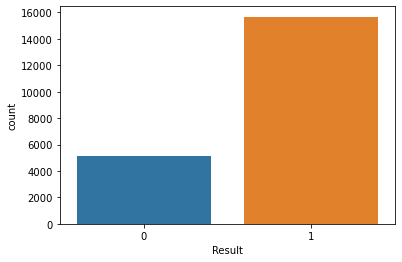

In [74]:
sns.countplot(sample_data.Result)
plt.show()

### Upsampling before splitting the data into train & test

In [75]:
# seperating '0', & '1' label 

sample_minority = sample_data.loc[sample_data['Result']==0]
sample_majority = sample_data.loc[sample_data['Result']==1]

In [76]:
# doing upsampling of minority classes... taking 100 to 80% ratio

# sample_majority.shape[0]*0.80

from sklearn.utils import resample
sample_data_minority_upsampled = resample(sample_minority , replace=True, n_samples=12000, random_state=42)

In [77]:
# combining upsampled data to majority class data...

sample_data_upsampled = pd.concat([sample_majority, sample_data_minority_upsampled ], ignore_index=True)

In [78]:
# seperating indepedent & depedent variabales..

x = sample_data_upsampled.drop(['Result'],axis=1).values
y = sample_data_upsampled.Result.values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=42)

In [80]:
# finding best ccp_alph tree prunning parameter. So that it will avoid overfit issue

def find_alpha(x_train, x_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    
    
    ccp_alphas = np.arange(0.000, 0.040, 0.002)
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = RandomForestClassifier(n_estimators=15, random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        clfs.append(clf)

    train_scores = [clf.score(x_train, y_train) for clf in clfs]
    test_scores = [clf.score(x_test, y_test) for clf in clfs]

    fig, ax = plt.subplots(figsize=(15,6))
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
    ax.set_xticks(np.arange(0.000,0.040, 0.002))
    ax.set_yticks(np.arange(0.70,1.01, 0.1))
    ax.legend()
    plt.grid(True)
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.show()

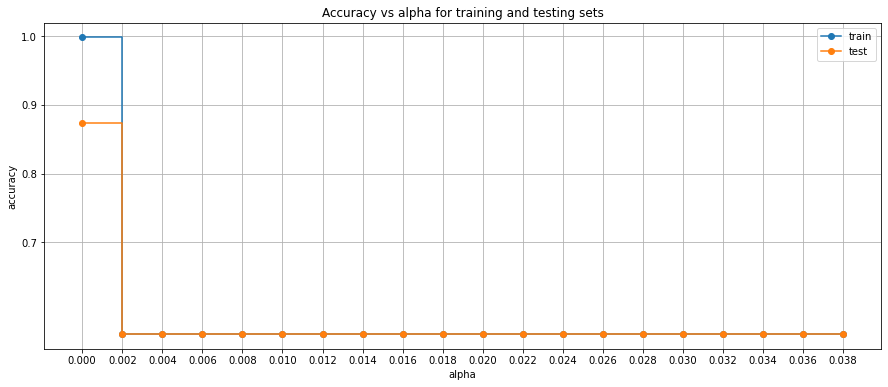

In [81]:
find_alpha(x_train, x_test, y_train, y_test)

#### ccp_alph parameter should be zero for this case.

### Building Model with n_estimators=100

In [82]:
from sklearn.ensemble import RandomForestClassifier
sample_RF_upsampled = RandomForestClassifier(n_estimators=100, random_state=42)

In [83]:
clf_sample = sample_RF_upsampled.fit(x_train, y_train)

In [84]:
y_pred_train = clf_sample.predict(x_train)
y_pred = clf_sample.predict(x_test)

In [85]:
print(classification_report(y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9600
           1       1.00      1.00      1.00     12539

    accuracy                           1.00     22139
   macro avg       1.00      1.00      1.00     22139
weighted avg       1.00      1.00      1.00     22139



In [86]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2400
           1       0.89      0.94      0.92      3135

    accuracy                           0.90      5535
   macro avg       0.91      0.90      0.90      5535
weighted avg       0.90      0.90      0.90      5535



In [87]:
cross_val_score(clf_sample, x, y)

array([0.89936766, 0.90496838, 0.90496838, 0.9100271 , 0.90169859])

### Building Model with n_estimators=15

In [88]:
from sklearn.ensemble import RandomForestClassifier
sample_RF15_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [89]:
clf_15_sample = sample_RF_upsampled.fit(x_train, y_train)

In [90]:
y_pred_train = clf_15_sample.predict(x_train)
y_pred = clf_15_sample.predict(x_test)

In [91]:
print(classification_report(y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9600
           1       1.00      1.00      1.00     12539

    accuracy                           1.00     22139
   macro avg       1.00      1.00      1.00     22139
weighted avg       1.00      1.00      1.00     22139



In [92]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2400
           1       0.89      0.94      0.92      3135

    accuracy                           0.90      5535
   macro avg       0.91      0.90      0.90      5535
weighted avg       0.90      0.90      0.90      5535



In [93]:
cross_val_score(clf_15_sample, x, y)

array([0.89936766, 0.90496838, 0.90496838, 0.9100271 , 0.90169859])

In [94]:
y_pred_whole = clf_15_sample.predict(dataset.drop(['Result'],axis=1))

print(classification_report(dataset.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.30      0.08      0.12    260904
           1       0.75      0.94      0.84    780361

    accuracy                           0.72   1041265
   macro avg       0.53      0.51      0.48   1041265
weighted avg       0.64      0.72      0.66   1041265



### Upsampling after train_test_split

##### Upsampling using sklearn resample

In [95]:
x = sample_data.drop(['Result'],axis=1).values
y = sample_data.Result.values

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=42)

In [97]:
from collections import Counter
Counter(y_train)

Counter({0: 4121, 1: 12539})

In [98]:
x_train_df = pd.DataFrame(x_train, columns=sample_data.drop(['Result'],axis=1).columns)
y_train_df = pd.DataFrame(y_train, columns=['Result'])

df_train = pd.concat([x_train_df, y_train_df],axis=1)

In [99]:
df_train_majority = df_train.loc[df_train['Result']==1]
df_train_minority = df_train.loc[df_train['Result']==0]

In [100]:
df_train_majority.shape

(12539, 20)

In [101]:
df_train_minority.shape

(4121, 20)

In [102]:
# checking 80% row counts w.r.t majority class
12487*0.80

9989.6

In [103]:
# doing upsampling of minority classes... taking 100 to 80% ratio

# sample_majority.shape[0]*0.80

from sklearn.utils import resample
df_train_minority_upsampled = resample(df_train_minority , replace=True, n_samples=9990, random_state=42)

In [104]:
after_split_upsampled = pd.concat([df_train_majority, df_train_minority_upsampled])

In [105]:
# splitting into x_train, y_train only..note: we have alerady splitted test sets using k fold...

x_train_upsampled = after_split_upsampled.drop(['Result'],axis=1).values
y_train_upsampled = after_split_upsampled.Result.values

In [106]:
from sklearn.ensemble import RandomForestClassifier
sample_RF15_after_split_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [107]:
sample_RF15_after_split_upsampled = sample_RF15_after_split_upsampled.fit(x_train_upsampled, y_train_upsampled)

In [108]:
y_pred_train = sample_RF15_after_split_upsampled.predict(x_train_upsampled)
y_pred = sample_RF15_after_split_upsampled.predict(x_test)

In [109]:
Counter(y_test)

Counter({1: 3135, 0: 1030})

In [110]:
print(classification_report(y_train_upsampled, y_pred_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       1.00      1.00      1.00     12539

    accuracy                           1.00     22529
   macro avg       1.00      1.00      1.00     22529
weighted avg       1.00      1.00      1.00     22529



In [111]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.21      0.08      0.12      1030
           1       0.75      0.90      0.82      3135

    accuracy                           0.70      4165
   macro avg       0.48      0.49      0.47      4165
weighted avg       0.62      0.70      0.64      4165



#### Conclusion:It is clear that, upsampling tech. is best suited for imbalanced dataset..when we upsample minority class before train_test_split

### Model Building On whole dataset

In [112]:
data_minority = dataset.loc[dataset['Result']==0]
data_majority = dataset.loc[dataset['Result']==1]

In [113]:
from sklearn.utils import resample
data_minority_upsampled = resample(data_minority, replace=True, n_samples=624290, random_state=42)
data_upsampled = pd.concat([data_majority, data_minority_upsampled ], ignore_index=True)

In [114]:
X = data_upsampled.drop(['Result'],axis=1).values
Y = data_upsampled.Result.values

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=30)

In [116]:
from sklearn.ensemble import RandomForestClassifier
model_rf_upsampled = RandomForestClassifier(n_estimators=15, random_state=42)

In [117]:
model_rf_upsampled.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [118]:
y_pred_train = model_rf_upsampled.predict(x_train)
y_pred_test = model_rf_upsampled.predict(x_test)

In [119]:
# classification report...for train set
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    499432
           1       0.99      0.99      0.99    624288

    accuracy                           0.99   1123720
   macro avg       0.99      0.99      0.99   1123720
weighted avg       0.99      0.99      0.99   1123720



In [120]:
# classification report...for test set
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85    124858
           1       0.89      0.87      0.88    156073

    accuracy                           0.87    280931
   macro avg       0.86      0.87      0.86    280931
weighted avg       0.87      0.87      0.87    280931



In [121]:
y_pred_whole = model_rf_upsampled.predict(dataset.drop(['Result'],axis=1))

print(classification_report(dataset.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88    260904
           1       0.95      0.97      0.96    780361

    accuracy                           0.94   1041265
   macro avg       0.93      0.91      0.92   1041265
weighted avg       0.94      0.94      0.94   1041265



In [122]:
from joblib import dump, load
dump(model_rf_upsampled, 'model_rf_upsampled.joblib')

['model_rf_upsampled.joblib']

In [123]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

x = dataset.drop(['Result'],axis=1).values
y = dataset.Result.values
   
for train_index, test_index in skf.split(x, y): 
    x_train_fold, x_test_fold = x[train_index], x[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    model_rf_upsampled.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(f1_score(y_test_fold, model_rf_upsampled.predict(x_test_fold)))

In [124]:
# Print the output. 
print('List of possible F1 score:', lst_accu_stratified) 
print('\nMaximum F1 score That can be obtained from this model is:', 
      (np.round(max(lst_accu_stratified)*100, 2)))
print('\nMinimum F1 score:', 
      (np.round(min(lst_accu_stratified)*100,2))) 
print('\nOverall F1 score:', 
     (np.round(np.mean(lst_accu_stratified)*100,2)))
print('\nStandard Deviation is:', np.round(np.std(lst_accu_stratified)))

List of possible F1 score: [0.8334086728587228, 0.8345982808837109, 0.8342140195390113, 0.8338922741121367, 0.8341324087363051]

Maximum F1 score That can be obtained from this model is: 83.46

Minimum F1 score: 83.34

Overall F1 score: 83.4

Standard Deviation is: 0.0
